In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the 'skeleton.png' image
image = cv2.imread('skeleton.png', cv2.IMREAD_GRAYSCALE)


Text(0.5, 1.0, 'Original Image - Skeleton')

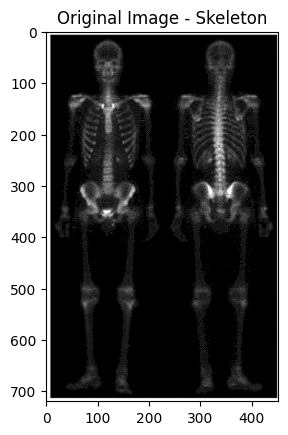

In [18]:
kernel3 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
image4 = cv2.filter2D(src=image, ddepth=-1, kernel=kernel3)
plt.imshow(image4, cmap='gray')
plt.title('Original Image - Skeleton')

[255 255 255 255 255 255 259 372 360 124   4   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
   0   5  21  37  28  37  41  63  80  76  76  73  76  80  76  67  67  69
  60  53  54  65  66  77  92 101 103 107 108 109 116 126 125 118 107 104
  99  98  92  81  57  47  47  55  62  69  80  82  83  81  82  83  82  66
  48  36  32  33  47  20   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

Text(0.5, 1.0, 'Adaptive Histogram Equalized Image')

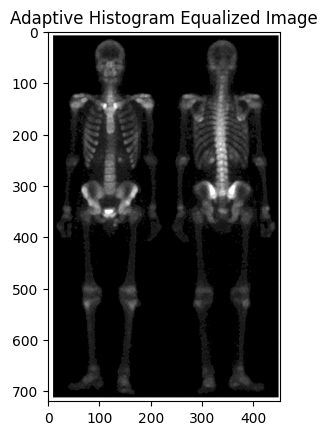

: 

In [80]:
sobel_filtered_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_filtered_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the Sobel results along x and y directions
sobel_combined = cv2.magnitude(sobel_filtered_x, sobel_filtered_y)


#print(sobel_combined[50])

sobel_combined_normalized = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32S)
result =image + sobel_combined_normalized

print(result[60])
normalized = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX,dtype=cv2.CV_32S)
plt.imshow(result, cmap='gray', vmin=0, vmax= 255)
plt.title('Adaptive Histogram Equalized Image')

Text(0.5, 1.0, 'Sharpened Image')

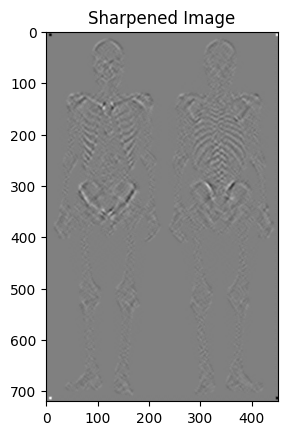

In [16]:
sobel_filtered = cv2.Sobel(image, cv2.CV_64F, 1, 1)
smoothed = cv2.blur(sobel_filtered, (5, 5))
plt.imshow(smoothed, cmap='gray')
plt.title('Sharpened Image')

C:\Users\Erfan\AppData\Local\Temp\ipykernel_4124\3371425769.py:4: RuntimeWarning: invalid value encountered in power
  power_law_transformed = np.power(final_sharpened / 255.0, gamma) * 255.0


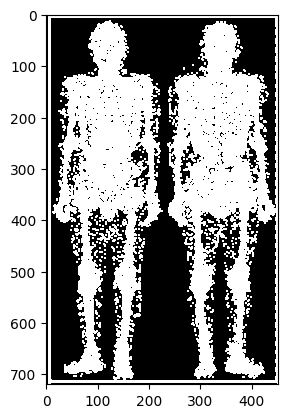

In [17]:
mask = sobel_filtered * smoothed
final_sharpened = laplacian_filtered + mask
gamma = 1.5  # Adjust the gamma value as needed
power_law_transformed = np.power(final_sharpened / 255.0, gamma) * 255.0
plt.imshow(power_law_transformed, cmap='gray')
